**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

**Dataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
PATH = "/content/gdrive/MyDrive/Semester 3 IIITD/NLP/NLP_Project/Dataset"

In [ ]:
train_data = pd.read_csv(os.path.join(PATH,"T1_Text_Summarization_English/T1_Text_Summarization_English_train.csv"))
test_data = pd.read_csv(os.path.join(PATH,"T1_Text_Summarization_English/T1_Text_Summarization_English_test.csv"))

**Top 5 rows**

In [ ]:
train_data.head()

,Heading,Summary,Article,id
0,India opposes China's Belt and Road Initiative...,The name of all member countries except India ...,"At SCO, India refuses to back China's Belt and...",0
1,"UN urges for maximum restraint, invokes Simla ...","Pakistan termed the Indian action as ""unilater...","UN chief invokes Shimla Agreement, calls for '...",1
2,"China, Pak to finalise deal to develop SEZ und...","""The agreement will be finalised between Khybe...","China, Pak to finalise deal to develop SEZ und...",2
3,"Covaxin effectively neutralises both Alpha, De...",The top health research institute said that an...,"Covaxin effectively neutralises both Alpha, De...",3
4,"Top White House officials buried CDC report, r...",The decision to shelve detailed advice from th...,"In this April 22, 2020, file photo President D...",4


In [ ]:
test_data.head()

,Heading,Article,id
0,EXPLAINER: How worrying is the variant first s...,How worrying is the variant first seen in Indi...,0
1,Pakistan Parliament to elect new prime ministe...,Pakistan’s National Assembly will elect a new ...,1
2,Indian-origin pathologist accused of botching ...,Dr. Khalid AhmedAn Indian-origin pathologist h...,2
3,China begins world's biggest census drive to c...,China begins world's biggest census drive to c...,3
4,"Indonesia prison fire kills 41 drug inmates, i...","Indonesia prison fire kills 41 drug inmates, i...",4


**Shapes of dataset**

In [ ]:
print("Train dataset shape: ",train_data.shape)
print("Test dataset shape : ",test_data.shape)

Train dataset shape:  (10052, 4)
Test dataset shape :  (2513, 3)


**Description of columns**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Heading  10052 non-null  object
 1   Summary  10052 non-null  object
 2   Article  10052 non-null  object
 3   id       10052 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 314.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Heading  2513 non-null   object
 1   Article  2513 non-null   object
 2   id       2513 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 59.0+ KB


**Text preprocessing**
1. Convert to lowercase
2. Remove unicode characters
3. Remove javascript code
4. Remove text after "also read"
5. Insert space after .

**Converting to lower case**

In [ ]:
def convert_to_lower(dataset):
    data = dataset.copy(deep=True)
    for col in data.columns:
        if col != 'id':
          for i in range(len(data)):
              data[col][i] = data[col][i].lower()
    return data

In [ ]:
# function to perform data preprocessing
def data_preprocessing(dataset):

    data = dataset.copy(deep=True)

    for i in range(len(data)):
        # input text
        input_txt = data['Article'][i]

        # remove unicode characters
        input_txt = re.sub("[^\x00-\x7F]+","",input_txt)

        # remove javascript code /*
        x = re.search(r"\/\*",input_txt)
        if x!= None:
          idx = x.start()
          input_txt = input_txt[:idx]

        # remove "also read" text
        x = re.search(r"also read",input_txt)
        if x != None:
          idx = x.start()
          input_txt = input_txt[:idx]

        # insert space after .
        input_txt = re.sub(r"\.([^0-9 ])",r". \1",input_txt)

        data['Article'][i] = input_txt

    return data

In [ ]:
train_data_pre = convert_to_lower(train_data)
test_data_pre = convert_to_lower(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_data_pre = data_preprocessing(train_data_pre)
test_data_pre = data_preprocessing(test_data_pre)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_data_pre.head()

,Heading,Summary,Article,id
0,india opposes china's belt and road initiative...,the name of all member countries except india ...,"at sco, india refuses to back china's belt and...",0
1,"un urges for maximum restraint, invokes simla ...","pakistan termed the indian action as ""unilater...","un chief invokes shimla agreement, calls for '...",1
2,"china, pak to finalise deal to develop sez und...","""the agreement will be finalised between khybe...","china, pak to finalise deal to develop sez und...",2
3,"covaxin effectively neutralises both alpha, de...",the top health research institute said that an...,"covaxin effectively neutralises both alpha, de...",3
4,"top white house officials buried cdc report, r...",the decision to shelve detailed advice from th...,"in this april 22, 2020, file photo president d...",4


In [ ]:
test_data_pre.head()

,Heading,Article,id
0,explainer: how worrying is the variant first s...,how worrying is the variant first seen in indi...,0
1,pakistan parliament to elect new prime ministe...,pakistans national assembly will elect a new p...,1
2,indian-origin pathologist accused of botching ...,dr. khalid ahmedan indian-origin pathologist h...,2
3,china begins world's biggest census drive to c...,china begins world's biggest census drive to c...,3
4,"indonesia prison fire kills 41 drug inmates, i...","indonesia prison fire kills 41 drug inmates, i...",4


**Saving preprocessed data**

In [ ]:
train_data_pre.to_csv(os.path.join(PATH,"preprocessed_data/whole_dataset/train.csv"),index=False)
test_data_pre.to_csv(os.path.join(PATH,"preprocessed_data/whole_dataset/test.csv"),index=False)

**Max length Computation**
1. Headline max length
2. Article max length
3. Summary max length 

**Function to return length of text in data column**

In [ ]:
def text_length(data,column_name):
    count=[]
    for sent in data[column_name]:
      count.append(len(sent.split()))
    return count

**Checking for Train dataset**

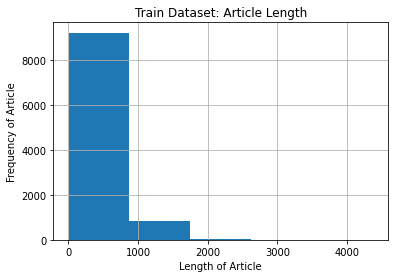

In [ ]:
article_count = text_length(train_data_pre,"Article")
pd.DataFrame(article_count).hist(bins=5)
plt.title("Train Dataset: Article Length")
plt.xlabel("Length of Article")
plt.ylabel("Frequency of Article")
plt.show()

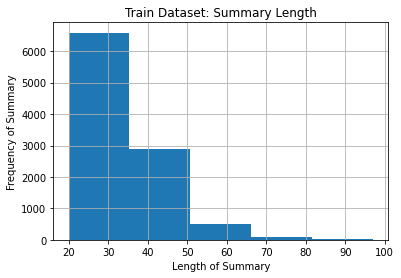

In [ ]:
summary_count = text_length(train_data_pre,"Summary")
pd.DataFrame(summary_count).hist(bins=5)
plt.title("Train Dataset: Summary Length")
plt.xlabel("Length of Summary")
plt.ylabel("Frequency of Summary")
plt.show()

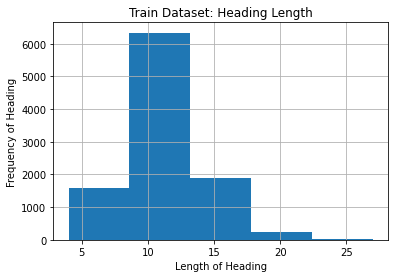

In [ ]:
article_count = text_length(train_data_pre,"Heading")
pd.DataFrame(article_count).hist(bins=5)
plt.title("Train Dataset: Heading Length")
plt.xlabel("Length of Heading")
plt.ylabel("Frequency of Heading")
plt.show()

**Checking for Test Data**

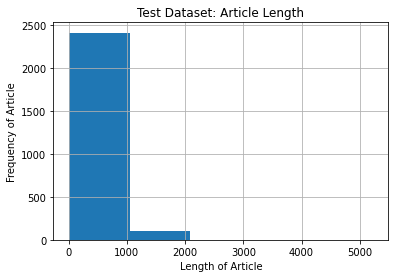

In [ ]:
article_count = text_length(test_data_pre,"Article")
pd.DataFrame(article_count).hist(bins=5)
plt.title("Test Dataset: Article Length")
plt.xlabel("Length of Article")
plt.ylabel("Frequency of Article")
plt.show()

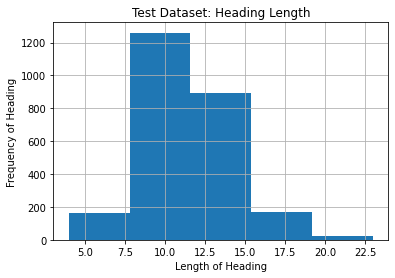

In [ ]:
article_count = text_length(test_data_pre,"Heading")
pd.DataFrame(article_count).hist(bins=5)
plt.title("Test Dataset: Heading Length")
plt.xlabel("Length of Heading")
plt.ylabel("Frequency of Heading")
plt.show()

**Check the summary/article/heading percentage covering x number of words**

In [ ]:
def percentage_col(data, column, length):
    cnt = 0
    for i in data[column]:
        if(len(i.split()) <= length):
            cnt = cnt+1
    return (cnt/len(data[column]))

In [ ]:
print("---------------Train Dataset---------------")
print("Heading, length = 18   : ", percentage_col(train_data_pre, "Heading", 18)*100,"%")
print("Article, length = 1500 : ", percentage_col(train_data_pre, "Article", 1500)*100,"%")
print("Summary, length = 56   : ", percentage_col(train_data_pre, "Summary", 56)*100,"%")

---------------Train Dataset---------------
Heading, length = 18   :  98.63708714683645 %
Article, length = 1500 :  99.62196577795464 %
Summary, length = 56   :  97.05531237564664 %


In [ ]:
print("---------------Test Dataset---------------")
print("Heading, length = 18   : ", percentage_col(test_data_pre, "Heading", 18)*100,"%")
print("Article, length = 1500 : ", percentage_col(test_data_pre, "Article", 1500)*100,"%")

---------------Test Dataset---------------
Heading, length = 18   :  98.44807003581377 %
Article, length = 1500 :  99.64186231595701 %
